In [1]:
import pandas
from matplotlib import pyplot
import numpy

In [2]:
data_frame = pandas.read_csv("covid.csv");
data = data_frame.loc[data_frame['Country'] == 'The United Kingdom']

new_cases = list(data["New_cases"])
new_deaths = list(data["New_deaths"])

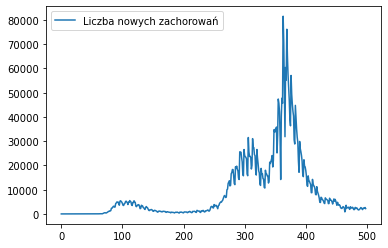

In [3]:
pyplot.plot(new_cases, label="Liczba nowych zachorowań")
pyplot.legend()
pyplot.show()

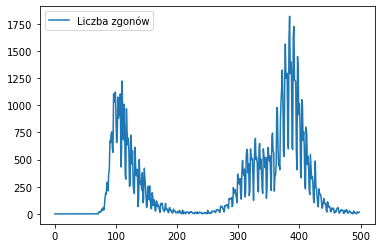

In [4]:
pyplot.plot(new_deaths, label="Liczba zgonów")
pyplot.legend()
pyplot.show()

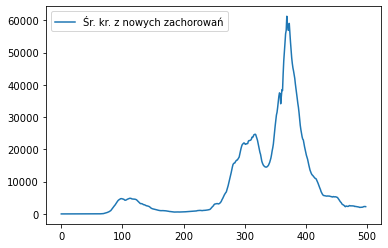

In [5]:
def moving_avg(data):
    length = len(data)
    avg = []
    for i in range(length):
        if i <= 6:
            avg.append(numpy.mean(data[ : (i+1) ]))
        else:
            avg.append(numpy.mean(data[ (i-6) : (i+1) ]))
    return avg

number_of_days = len(new_cases)
days = list(range(number_of_days))

new_cases_avg = moving_avg(new_cases)

pyplot.plot(new_cases_avg, label="Śr. kr. z nowych zachorowań")
pyplot.legend()
pyplot.show()

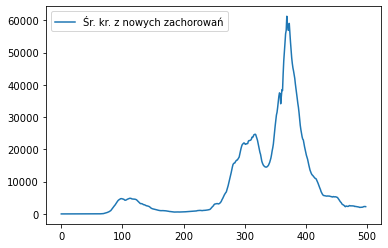

In [6]:
new_deaths_avg = moving_avg(new_deaths)

pyplot.plot(new_cases_avg, label="Śr. kr. z nowych zachorowań")
pyplot.legend()
pyplot.show()

In [7]:
def linear_regression(args, values):
    X = [ [1,x] for x in args]
    Y = values
    X = numpy.array(X)
    Y = numpy.array(Y)
    beta = X.T.dot(X)
    beta = numpy.linalg.inv(beta)
    beta = beta.dot(X.T)
    beta = beta.dot(Y)
    return beta

beta_cases = linear_regression(days, new_cases_avg)
beta_deaths = linear_regression(days, new_deaths_avg)
print(beta_cases)
print(beta_deaths)

[-819.0777349    39.02165148]
[127.50428285   0.51512381]


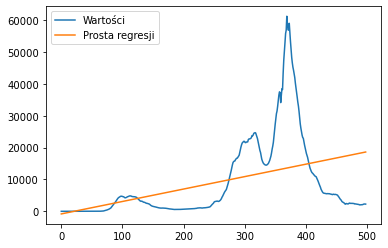

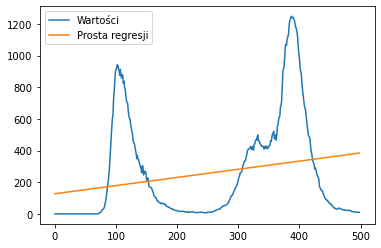

In [8]:
def present_regression_result(args, values, line):
    f = lambda x : line[0] + line[1] * x
    regression_results = list( map( f, args ) )
    pyplot.plot(args, values, label="Wartości")
    pyplot.plot(args, regression_results, label="Prosta regresji")
    pyplot.legend()
    pyplot.show()

present_regression_result(days, new_cases_avg, beta_cases)
present_regression_result(days, new_deaths_avg, beta_deaths)

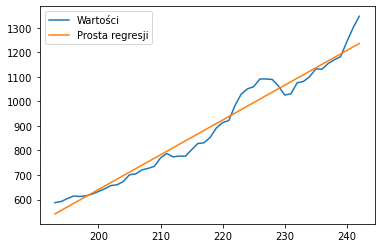

((193, 243), array([-2193.98344023,    14.17271137]))


In [9]:
def regression_score(args, values, beta ):
    total_sum = 0
    for x in args:
        total_sum += ( beta[0] + beta[1] * x - values[x] )**2
    return total_sum

def search_for_the_best(args, values, interval, a, b):
    left = a;
    right = left + interval;
    best_interval = (left, right)

    if right >= b: return None

    best_line = linear_regression( args[left:right], values[left:right] )
    minimum = regression_score( args[left:right], values, best_line )
    left += 1
    right += 1

    while right <= b:
        result = linear_regression( args[left:right], values[left:right] )
        score = regression_score( args[left:right], values, result )
        left += 1
        right += 1
        if score < minimum:
            minimum = score
            best_interval = (left, right)
            best_line = result

    return (best_interval, best_line)

best_cases = search_for_the_best(days, new_cases_avg, 50, 50, 499)
best_interval_arguments = days[ best_cases[0][0] : best_cases[0][1] ];
best_interval_values = new_cases_avg[ best_cases[0][0] : best_cases[0][1] ]
present_regression_result(best_interval_arguments, best_interval_values, best_cases[1])

print(best_cases)

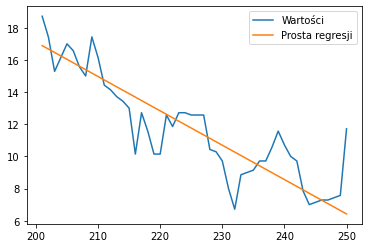

((201, 251), array([59.82555994, -0.21361688]))


In [10]:
best_deaths = search_for_the_best(days, new_deaths_avg, 50, 50, 499)
best_interval_arguments = days[ best_deaths[0][0] : best_deaths[0][1] ];
best_interval_values = new_deaths_avg[ best_deaths[0][0] : best_deaths[0][1] ]
present_regression_result(best_interval_arguments, best_interval_values, best_deaths[1])

print(best_deaths)